In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 783 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [3]:
start = '2021-08-20'
end = '2022-08-20'
df =yf.download("AMD", start, end)

[*********************100%***********************]  1 of 1 completed


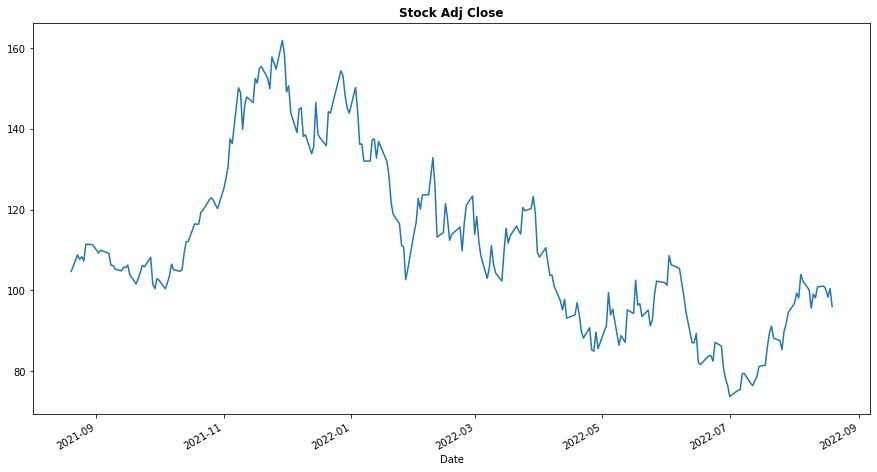

In [4]:
plt.figure(figsize=(15,8))
df["Adj Close"].plot()
plt.title("Stock Adj Close", weight='bold')
plt.show()

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,104.320000,105.980003,103.989998,104.650002,104.650002,55227600
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500
2021-08-26,108.570000,109.230003,106.839996,107.269997,107.269997,51442500


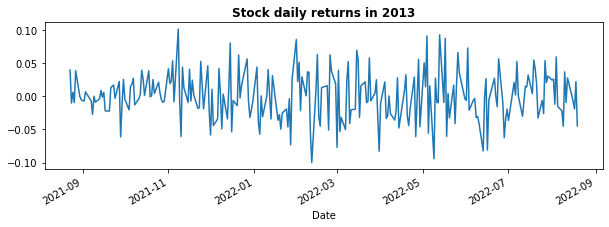

In [6]:
fig = plt.figure()
fig.set_size_inches(10,3)
df["Adj Close"].pct_change().plot()
plt.title(u"Stock daily returns in 2013", weight='bold');

0.03624402529386058

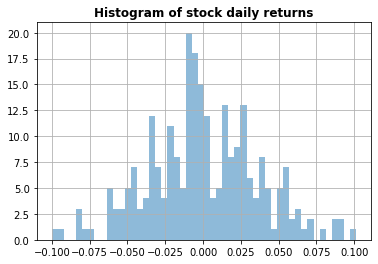

In [8]:
df["Adj Close"].pct_change().hist(bins=50, histtype='stepfilled', alpha=0.5)
plt.title(u"Histogram of stock daily returns", weight='bold')
df["Adj Close"].pct_change().std()

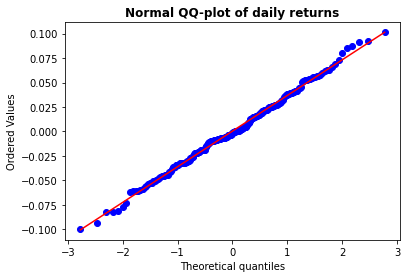

In [10]:
Q = df["Adj Close"].pct_change().dropna()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of daily returns", weight="bold");

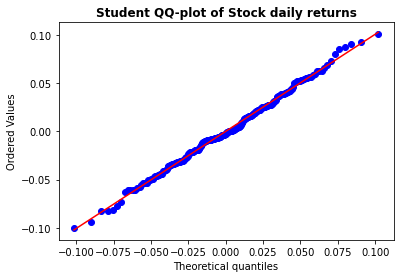

In [11]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of Stock daily returns", weight="bold");

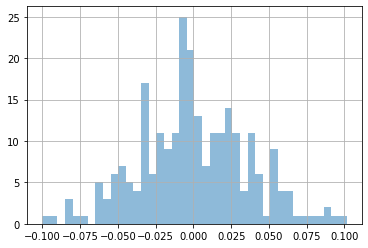

In [14]:
returns = df["Adj Close"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()
returns.hist(bins=40, histtype='stepfilled', alpha=0.5);

In [15]:
returns.quantile(0.05)

-0.05786710214154167

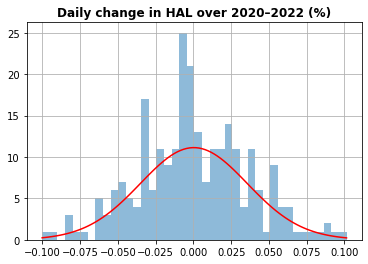

In [18]:
support = numpy.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, histtype='stepfilled', alpha=0.5);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.title("Daily change in HAL over 2020–2022 (%)", weight='bold')
plt.show()